In [ ]:
import numpy as np
import pandas as pd

## CIFAR10 Dataset 생성

In [ ]:
from tensorflow.keras.datasets import cifar10 # cifar100도 있음

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170500096/170498071 [==============================] - 841s 5us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)


AttributeError: 'numpy.ndarray' object has no attribute 'shaep'

In [ ]:
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [ ]:
# array로 첫번째 이미지 출력/


In [ ]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


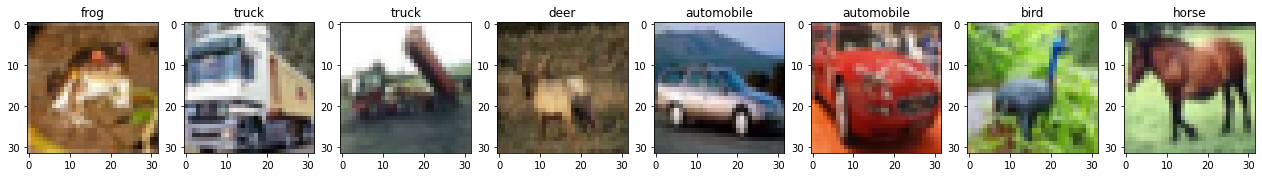

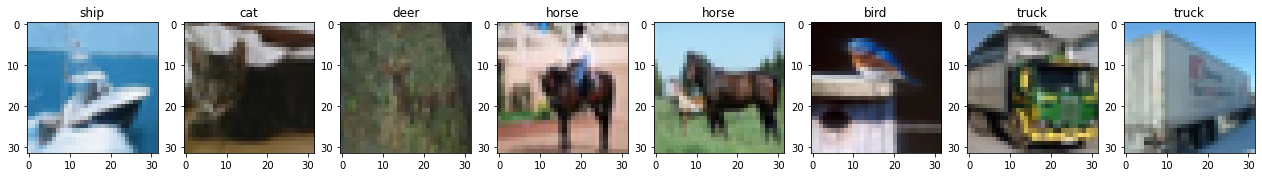

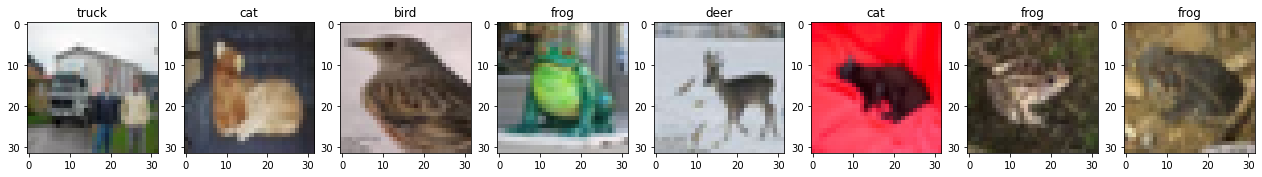

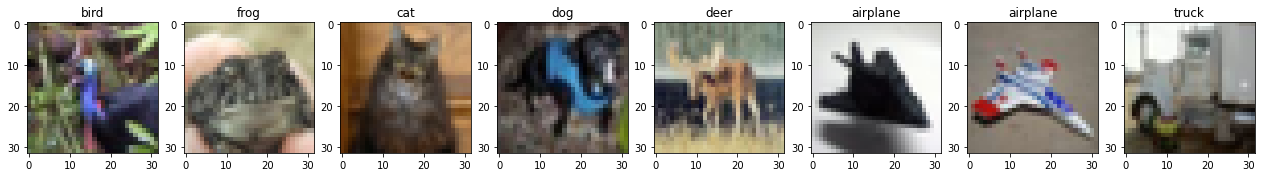

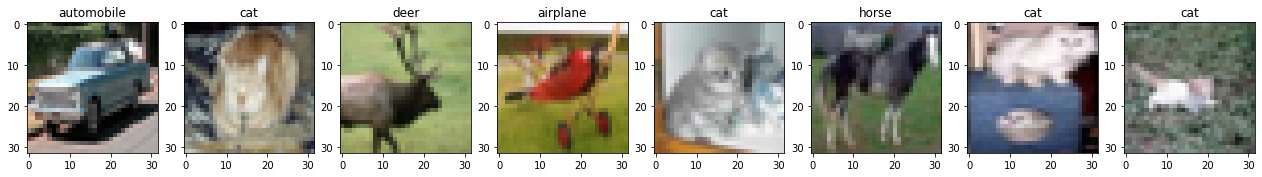

In [ ]:
# CIFAR10 데이터 시각화

import matplotlib.pyplot as plt

%matplotlib inline
def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
for x in range(0, 5):
    show_images(train_images[x*8: (x+1)*8], train_labels[x*8: (x+1)*8], ncols=8)

In [ ]:
# Date prepeocessing
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)


In [ ]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

## Custom Model 생성

In [ ]:
IMAGE_SIZE = 32

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor) # same ; padding을 알아서 하겠다는 것
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [ ]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x) # node간 rate를 50%정도 잘라내겠다는 것 ( 속도문제로 인해 )
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0     

In [ ]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 204s 305ms/step - loss: 2.3029 - accuracy: 0.0951 - val_loss: 2.3029 - val_accuracy: 0.0975
Epoch 2/30
566/665 [========================>.....] - ETA: 31s - loss: 2.3027 - accuracy: 0.0986